In [37]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import numpy as np
import datetime

TRAINING_FRACTION = 0.8
N_DENSE = 2
L=4

In [6]:
user = 1
if user == 1:
    prefix_s3 = "/home/owen/"
    prefix_data = "/home/owen/repos/"
elif user == 2:
    prefix_data = "/Users/omyers/repos/"
    
tensorboard_log_dir = "{}/logs/fit/".format(prefix_s3) + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


In [20]:
# Just do this so it is easier to configure arbitrary choices
work_with_t_list = [ "00.10", "00.20", "00.30",]# "00.40", "00.50", "00.60", "00.70", "00.80", "00.90", "01.00", "01.10", "01.20", "01.30", "01.40", "01.50", "01.60", "01.70", "01.80", "01.90", "02.00"]

In [23]:
df_bins = None
df_conf = None
for i, t_string in enumerate(work_with_t_list):
    bins_f_name = "{prefix_data}z3support/data/XYMLData/2DXY-configs-L-{l}/bins_2DXY-configs-L-{l}-{l}-{t}-0000.txt".format(
        l = str(L).zfill(4),
        t = t_string,
        prefix_data = prefix_data
    )
    configs_f_name = "{prefix_data}z3support/data/XYMLData/2DXY-configs-L-{l}/spinConfigs_2DXY-configs-L-{l}-{l}-{t}-0000.txt".format(
        l = str(L).zfill(4),
        t = t_string,
        prefix_data = prefix_data
    )
    if i == 0:
        df_bins = pd.read_csv(bins_f_name, sep="\t")
        df_conf = pd.read_csv(configs_f_name, delimiter=r"\s+", header=None)
    else:
        cur_df_bins = pd.read_csv(bins_f_name, sep="\t")
        cur_df_conf = pd.read_csv(configs_f_name, delimiter=r"\s+", header=None)
        df_bins = df_bins.append(cur_df_bins) 
        df_conf = df_conf.append(cur_df_conf) 
    print(bins_f_name)

/home/owen/repos/z3support/data/XYMLData/2DXY-configs-L-0004/bins_2DXY-configs-L-0004-0004-00.10-0000.txt
/home/owen/repos/z3support/data/XYMLData/2DXY-configs-L-0004/bins_2DXY-configs-L-0004-0004-00.20-0000.txt
/home/owen/repos/z3support/data/XYMLData/2DXY-configs-L-0004/bins_2DXY-configs-L-0004-0004-00.30-0000.txt


In [24]:
df_bins.shape

(30000, 10)

In [26]:
df_bins = df_bins.astype(
    {
        " T ": float,
        " binNum": int,
    }
)

In [32]:
df_conf["T"] = df_bins[" T "]

In [33]:
mean_col = df_conf[0].copy()
for i in range(1, L):
    mean_col += df_conf[i]

mean_col /= L

In [34]:
df_conf["M"] = mean_col

In [35]:
df_conf.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'M', 'T'], dtype='object')

In [47]:
df_conf.shape

(30000, 18)

In [48]:
df_conf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,M,T
0,0.162246,5.973095,6.133531,6.156717,0.025063,6.050038,6.020508,6.223365,0.067779,6.153401,6.032560,0.073008,6.134114,6.160847,0.052111,0.115091,4.606397,0.1
1,4.983357,4.822849,4.691446,4.885390,5.122919,4.853683,4.793827,4.921220,4.869675,5.132625,5.236716,4.908288,4.935758,4.859949,4.700985,5.001698,4.845760,0.1
2,2.727240,2.390374,2.708473,2.618912,2.354293,2.384652,2.535973,2.779869,2.592872,2.413333,2.715683,2.716086,2.763101,2.847251,2.660584,2.721994,2.611250,0.1
3,5.762936,5.839879,0.023180,6.216394,6.118754,6.144861,0.033664,0.032085,6.282960,0.085963,0.031738,0.152408,6.027732,6.234099,0.083261,0.023046,4.460597,0.1
4,4.463147,4.564015,4.342138,4.595675,4.269949,4.323170,4.407668,4.411044,4.368104,4.413393,4.490482,4.530060,4.503687,4.435605,4.239925,4.452277,4.491244,0.1


In [54]:
cols = []
for i in range(L*L):
    cols.append(str(i))
    cols.append(str(i))
print(cols)

['0', '0', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', '10', '10', '11', '11', '12', '12', '13', '13', '14', '14', '15', '15']


In [56]:
xy_spec = ["x", "y"] * L*L

In [58]:
for i in zip(cols, xy_spec):
    continue
    #print(i)

In [59]:
np_angle_matrix = df_conf.drop(["T","M"], axis=1).to_numpy()

In [63]:
np_x_matrix = np.cos(np_angle_matrix)
np_y_matrix = np.sin(np_angle_matrix)

In [67]:
#np.concatenate(np_x_matrix, np_x_matrix, axis=1)
df = pd.DataFrame(columns=pd.MultiIndex.from_tuples(zip(cols, xy_spec)))

In [ ]:
df.sort_index(ascending=True, inplace=True, axis=1)

In [150]:
df.loc[:, (slice(None), slice("x"))] = np_x_matrix

In [155]:
np_x_matrix

array([[ 0.986867  ,  0.9523061 ,  0.98882268, ...,  0.99252601,
         0.99864253,  0.99338439],
       [ 0.26766423,  0.11023518, -0.0209416 , ...,  0.14702497,
        -0.01140408,  0.28528988],
       [-0.91537707, -0.73085744, -0.90766075, ..., -0.95699346,
        -0.88652882, -0.91325267],
       ...,
       [-0.99996531, -0.78798196, -0.81200276, ..., -0.93132133,
        -0.97910067, -0.96902602],
       [ 0.73166437,  0.99926935,  0.68109528, ...,  0.951746  ,
         0.93244177,  0.90483846],
       [-0.35623912, -0.17665983, -0.22011722, ...,  0.07685637,
         0.24162666,  0.04673386]])

In [156]:
np_y_matrix

array([[ 0.16153491, -0.30514438, -0.14909632, ..., -0.12203327,
         0.05208737,  0.11483667],
       [-0.96351225, -0.99390553, -0.9997807 , ..., -0.98913278,
        -0.99993497, -0.95844128],
       [ 0.40259759,  0.68253015,  0.41970462, ...,  0.29010949,
         0.46267338,  0.40739362],
       ...,
       [ 0.00832939, -0.61569833, -0.5836536 , ..., -0.36419854,
         0.20337621,  0.24695866],
       [-0.68166506, -0.03821998, -0.7321948 , ..., -0.30688686,
        -0.36132028, -0.42575505],
       [ 0.93439482,  0.98427197,  0.97547343, ...,  0.99704218,
         0.97036929,  0.99890738]])

In [153]:
df.loc[:, (slice(None), "y")] = np_y_matrix

In [154]:
df

0                   1                  10                  11  \
              x         y         x         y         x         y         x   
0      0.986867  0.161535  0.952306 -0.305144  0.988823 -0.149096  0.992013   
1      0.267664 -0.963512  0.110235 -0.993906 -0.020942 -0.999781  0.172139   
2     -0.915377  0.402598 -0.730857  0.682530 -0.907661  0.419705 -0.866484   
3      0.867695 -0.497097  0.903339 -0.428928  0.999731  0.023177  0.997770   
4     -0.246669 -0.969100 -0.147830 -0.989013 -0.361850 -0.932236 -0.116449   
...         ...       ...       ...       ...       ...       ...       ...   
29995  0.246862 -0.969051  0.309302 -0.950964 -0.078424 -0.996920  0.407209   
29996 -0.610500 -0.792016 -0.715634 -0.698475 -0.613806 -0.789457 -0.639160   
29997 -0.999965  0.008329 -0.787982 -0.615698 -0.812003 -0.583654 -0.976266   
29998  0.731664 -0.681665  0.999269 -0.038220  0.681095 -0.732195  0.549889   
29999 -0.356239  0.934395 -0.176660  0.984272 -0.220117  0.975473 -0.372997   

                       12            ...         5                   6  \
              y         x         y  ...         x         y         x   
0     -0.126132  0.999686  0.025061  ...  0.997336  0.072943  0.988909   
1     -0.985073  0.399095 -0.916909  ...  0.194648 -0.980873  0.221516   
2      0.499204 -0.705761  0.708450  ... -0.910830  0.412782 -0.929223   
3     -0.066742  0.986512 -0.163692  ...  0.988408  0.151819  0.967549   
4     -0.993197 -0.428146 -0.903710  ... -0.181321 -0.983424 -0.207191   
...         ...       ...       ...  ...       ...       ...       ...   
29995 -0.913335  0.419934 -0.907555  ...  0.273856 -0.961771 -0.245455   
29996 -0.769074 -0.667019 -0.745041  ... -0.713515 -0.700640 -0.744314   
29997 -0.216573 -0.989320  0.145759  ... -0.989930 -0.141555 -0.950693   
29998 -0.835238  0.781016 -0.624511  ...  0.851688 -0.524048  0.481699   
29999  0.927833 -0.633948  0.773376  ...  0.431784  0.901977 -0.301467   

                        7                   8                   9            
              y         x         y         x         y         x         y  
0     -0.148520  0.992526 -0.122033  0.998643  0.052087  0.993384  0.114837  
1     -0.975157  0.147025 -0.989133 -0.011404 -0.999935  0.285290 -0.958441  
2      0.369519 -0.956993  0.290109 -0.886529  0.462673 -0.913253  0.407394  
3     -0.252684  0.998796 -0.049066  0.996536  0.083165  0.999734  0.023044  
4     -0.978301 -0.273263 -0.961939 -0.455082 -0.890450 -0.257189 -0.966361  
...         ...       ...       ...       ...       ...       ...       ...  
29995 -0.969408  0.360687 -0.932687  0.298391 -0.954444 -0.276970 -0.960878  
29996 -0.667830 -0.811583 -0.584237 -0.449800 -0.893129 -0.445553 -0.895256  
29997  0.310133 -0.931321 -0.364199 -0.979101  0.203376 -0.969026  0.246959  
29998 -0.876337  0.951746 -0.306887  0.932442 -0.361320  0.904838 -0.425755  
29999  0.953477  0.076856  0.997042  0.241627  0.970369  0.046734  0.998907  

[30000 rows x 32 columns]

In [158]:
train_with_meta_info = df.sample(frac=TRAINING_FRACTION, axis=0)
test_with_meta_info = df.drop(index=train_with_meta_info.index)
#train = train_with_meta_info.drop(["T","M"], axis=1)
#test = test_with_meta_info.drop(["T","M"], axis=1)
train = train_with_meta_info
test = test_with_meta_info

In [164]:
img_pca = PCA(n_components=N_DENSE)
img_pca.fit(train.to_numpy())

PCA(n_components=2)

In [168]:
components = img_pca.transform(df.to_numpy())

In [171]:
df.to_numpy().shape

(30000, 32)

In [166]:
components.shape

(30000, 2)

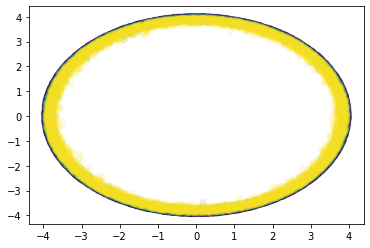

In [167]:
if N_DENSE > 1:
    plt.scatter(components[:,0], components[:,1], c=pd.to_numeric(df_conf["T"]), alpha=0.1)

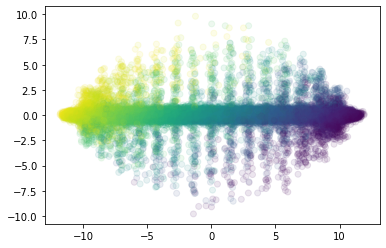

In [46]:
if N_DENSE > 1:
    plt.scatter(components[:,0], components[:,1], c=pd.to_numeric(df_conf["M"]), alpha=0.1)